In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/Ice_cream selling data.csv")

In [3]:
df.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [4]:
df.dtypes

Temperature (°C)           float64
Ice Cream Sales (units)    float64
dtype: object

In [5]:
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [9]:
x=df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.linear_model import LinearRegression
model_simple = LinearRegression()
model_simple.fit(x,y)
y_simple_pred = model_simple.predict(x)

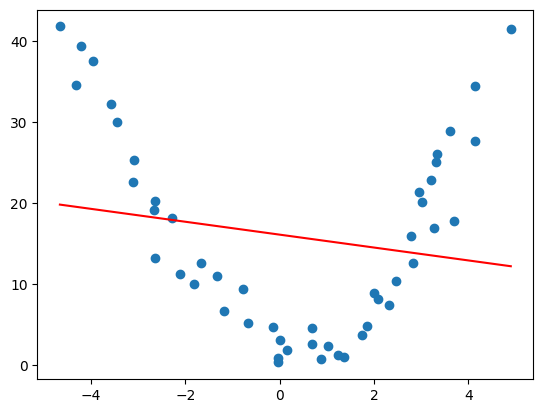

In [15]:
plt.scatter(x,y)
plt.plot(x,y_simple_pred,color='r')

In [16]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape = mean_absolute_percentage_error(y,y_simple_pred)
r2 = r2_score(y,y_simple_pred)
mape,r2

(3.2511805873785518, 0.030689536411547258)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
feature = PolynomialFeatures(degree =2)
x_poly = feature.fit_transform(x)

In [18]:
model_poly = LinearRegression()
model_poly.fit(x_poly,y)
y_poly_predict = model_poly.predict(x_poly)

In [19]:
mape = mean_absolute_percentage_error(y,y_poly_predict)
r2 = r2_score(y,y_poly_predict)
mape,r2

(0.6258942344825261, 0.9321137090423877)

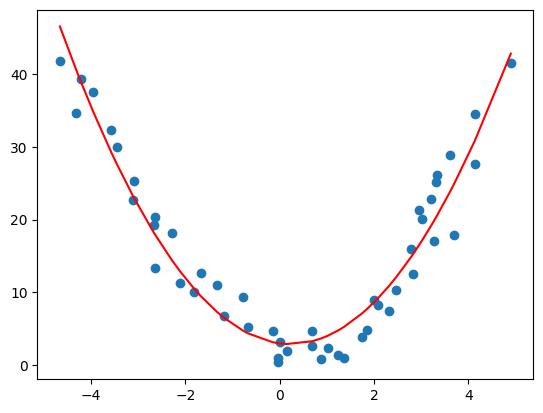

In [20]:
plt.scatter(x,y)
plt.plot(x,y_poly_predict,color='r')

In [23]:
df2 =pd.DataFrame(
    {
        "Acutal":y,
        "Simple Prediction":y_simple_pred,
        "Polynomial Prediction":y_poly_predict
        
    }
)

In [24]:
df2

,Acutal,Simple Prediction,Polynomial Prediction
0,41.842986,19.835042,46.564507
1,34.661120,19.559704,40.600548
2,39.383001,19.478008,38.915089
3,37.539845,19.267485,34.749272
4,32.284531,18.971914,29.331940
5,30.001138,18.874076,27.649735
6,22.635401,18.597489,23.192862
7,25.365022,18.575875,22.863178
8,19.226970,18.250250,18.222266
9,20.279679,18.234182,18.009098
